模拟下面三种生理状态
1. Healthy reference 
2. Heart failure with reduced ejection fraction (HFrEF)
3. Heart failure with preserved ejection fraction (HFpEF)

## 1. 健康状态

In [10]:
import circadapt
import matplotlib.pyplot as plt
import numpy as np

from circadapt import VanOsta2024
model = VanOsta2024()
model['Solver']['store_beats'] = 10
model.run(stable = True)

In [11]:
# get all pressure signals 
pressures = model['Cavity']['p'][:, ['cLv', 'La', 'SyArt']]*7.5e-3
p_lv, p_la, p_ao = pressures.T

# get LV and LA volume
volumes = model['Cavity']['V'][:, ['cLv', 'La']]*1e6
V_lv, V_la = volumes.T

# get time
time = model['Solver']['t']*1e3

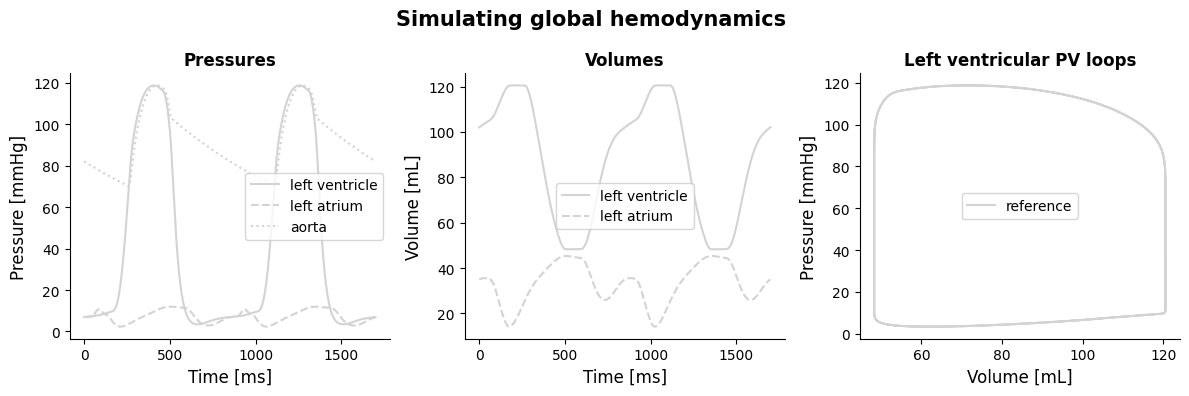

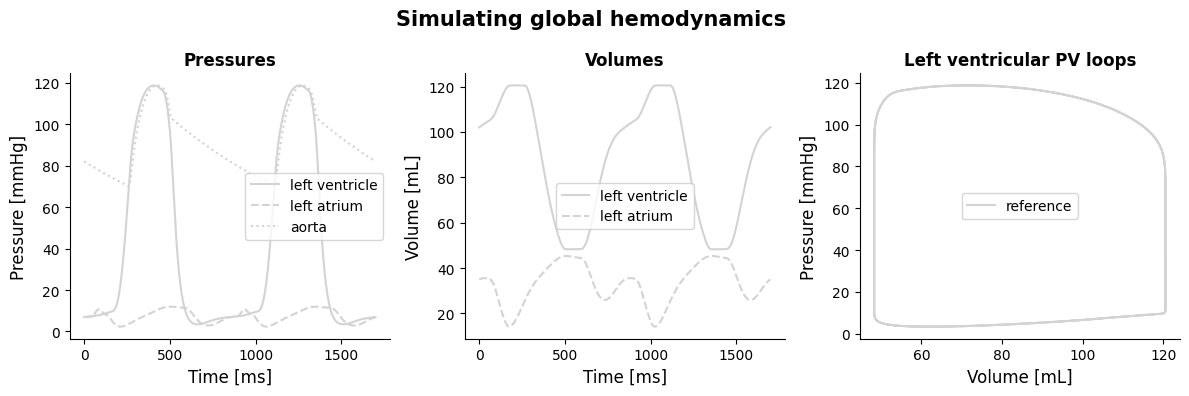

In [12]:
# Plot hemodynamics 

fig = plt.figure(1, figsize=(12, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Plot pressures
ax1.plot(time, p_lv, color = 'lightgrey', linestyle = '-', label = 'left ventricle')
ax1.plot(time, p_la, color = 'lightgrey', linestyle = '--', label = 'left atrium')
ax1.plot(time, p_ao, color = 'lightgrey', linestyle = ':', label = 'aorta')
ax1.legend()

# Plot volumes
ax2.plot(time, V_lv, color = 'lightgrey', linestyle = '-', label = 'left ventricle')
ax2.plot(time, V_la, color = 'lightgrey', linestyle = '--', label = 'left atrium')
ax2.legend()

# Plot PV loops
ax3.plot(V_lv, p_lv, color = 'lightgrey', linestyle = '-', label = 'reference')
ax3.legend()

# plot design, add labels
for ax in [ax1, ax2, ax3]:
    ax.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Time [ms]', fontsize=12)
ax2.set_xlabel('Time [ms]', fontsize=12)
ax3.set_xlabel('Volume [mL]', fontsize=12)

ax1.set_ylabel('Pressure [mmHg]', fontsize=12)
ax2.set_ylabel('Volume [mL]', fontsize=12)
ax3.set_ylabel('Pressure [mmHg]', fontsize=12)

ax1.set_title('Pressures',
             fontsize=12, fontweight='bold')
ax2.set_title('Volumes',
             fontsize=12, fontweight='bold')
ax3.set_title('Left ventricular PV loops',
             fontsize=12, fontweight='bold')

fig.suptitle('Simulating global hemodynamics ',
             fontsize=15, fontweight='bold')

plt.tight_layout()
fig

## 2.左心室和心室间隔的收缩能力下降40%

In [13]:
# get reference sfact values for the left ventricle and intraventricular septum
model = VanOsta2024() 

sfact_lv = model['Patch']['Sf_act']['pLv0']
sfact_sv = model['Patch']['Sf_act']['pSv0']

# reduce the value for sfact to 60% of its inital value
model['Patch']['Sf_act']['pLv0'] = 0.6*sfact_lv
model['Patch']['Sf_act']['pSv0'] = 0.6*sfact_sv

print('The new sfact for the LV and SV equal ', model['Patch']['Sf_act']['pLv0']*1e3, ' kPa and ', 1e3*model['Patch']['Sf_act']['pSv0'], ' kPa respectively.')

# run the model
model.run(stable = True)

The new sfact for the LV and SV equal  72000000.0  kPa and  72000000.0  kPa respectively.


In [14]:
# obtain hemodynamics 

# get all pressure signals 
pressures = model['Cavity']['p'][:, ['cLv', 'La', 'SyArt']]*7.5e-3
p_lv, p_la, p_ao = pressures.T

# get LV and LA volume
volumes = model['Cavity']['V'][:, ['cLv', 'La']]*1e6
V_lv, V_la = volumes.T

# get time
time = model['Solver']['t']*1e3

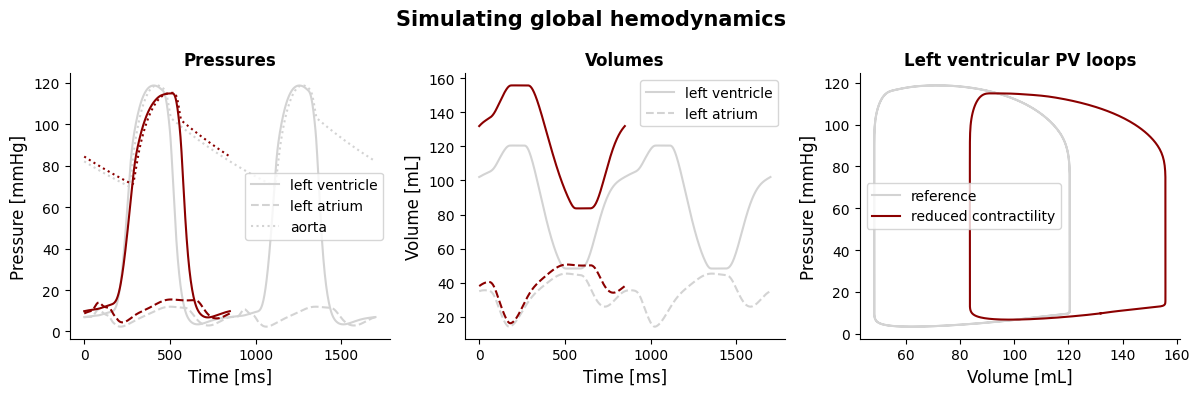

In [ ]:
# plot hemodynamics 

# Plot pressures
ax1.plot(time, p_lv, color = 'darkred', linestyle = '-', label = 'left ventricle')
ax1.plot(time, p_la, color = 'darkred', linestyle = '--', label = 'left atrium')
ax1.plot(time, p_ao, color = 'darkred', linestyle = ':', label = 'aorta')

# Plot volumes
ax2.plot(time, V_lv, color = 'darkred', linestyle = '-', label = 'left ventricle')
ax2.plot(time, V_la, color = 'darkred', linestyle = '--', label = 'left atrium')

# Plot PV loops
ax3.plot(V_lv, p_lv, color = 'darkred', linestyle = '-', label = 'reduced contractility')
ax3.legend()

fig

## 心肌刚性增加70%

The new k1 and td for the LV and SV equal  17.0  [-].


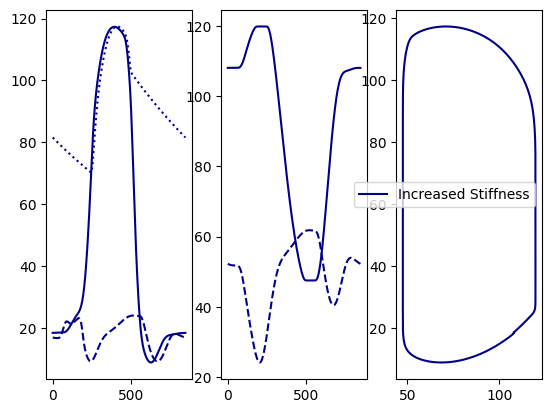

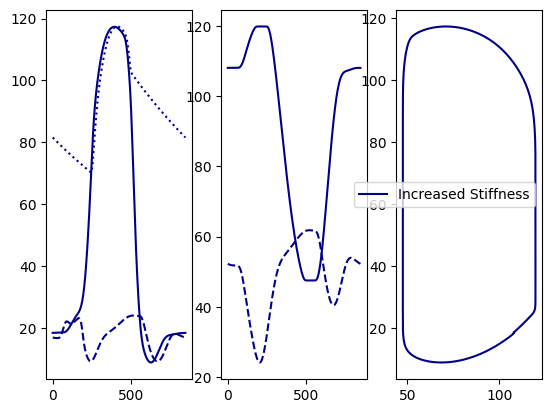

In [16]:
# get reference values for stiffness  (these are equal for the LV and intraventricular septum)

model = VanOsta2024()

# set parameters for the LV and septum
model['Patch']['k1'][['pLv0', 'pSv0']] *= 1.7     # increase of 70%

print('The new k1 and td for the LV and SV equal ', model['Patch']['k1']['pLv0'], ' [-].')

# run the model
model.run(stable = True)

# obtain hemodynamics 

# get all pressure signals 
pressures = model['Cavity']['p'][:, ['cLv', 'La', 'SyArt']]*7.5e-3
p_lv, p_la, p_ao = pressures.T

# get LV and LA volume
volumes = model['Cavity']['V'][:, ['cLv', 'La']]*1e6
V_lv, V_la = volumes.T

# get time
time = model['Solver']['t']*1e3

# plot hemodynamics 
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# Plot pressures
ax1.plot(time, p_lv, color = 'darkblue', linestyle = '-', label = 'left ventricle')
ax1.plot(time, p_la, color = 'darkblue', linestyle = '--', label = 'left atrium')
ax1.plot(time, p_ao, color = 'darkblue', linestyle = ':', label = 'aorta')

# Plot volumes
ax2.plot(time, V_lv, color = 'darkblue', linestyle = '-', label = 'left ventricle')
ax2.plot(time, V_la, color = 'darkblue', linestyle = '--', label = 'left atrium')

# Plot PV loops
ax3.plot(V_lv, p_lv, color = 'darkblue', linestyle = '-', label = 'Increased Stiffness')
ax3.legend()

plt.show()
fig